In [1]:
!pip3 install requests pymongo pandas matplot seaborn statsmodels scikit-learn torch


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
from loader import CSVDataset
from torch.utils.data import DataLoader
import pandas as pd

file_path = './data/customer_data.csv'

dataset = CSVDataset(file_path)

print(dataset.data)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
dataloader.batch_size

           id  age  gender  income  education  region  loyalty_status  \
0           1   27       1   40682          0       0               0   
1           2   29       1   15317          3       3               1   
2           3   37       1   38849          0       3               2   
3           4   30       1   11568          2       2               1   
4           5   31       0   46952          1       1               1   
...       ...  ...     ...     ...        ...     ...             ...   
99995   99996   31       0   19691          1       3               1   
99996   99997   36       1   17428          2       2               1   
99997   99998   29       1   13222          1       3               1   
99998   99999   31       0   40093          0       3               1   
99999  100000   35       0   22249          1       3               2   

       purchase_frequency  purchase_amount  product_category  promotion_usage  \
0                       0            18249

32

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'loyalty_status'}>,
        <Axes: title={'center': 'purchase_frequency'}>,
        <Axes: title={'center': 'purchase_amount'}>],
       [<Axes: title={'center': 'product_category'}>,
        <Axes: title={'center': 'promotion_usage'}>,
        <Axes: title={'center': 'satisfaction_score'}>]], dtype=object)

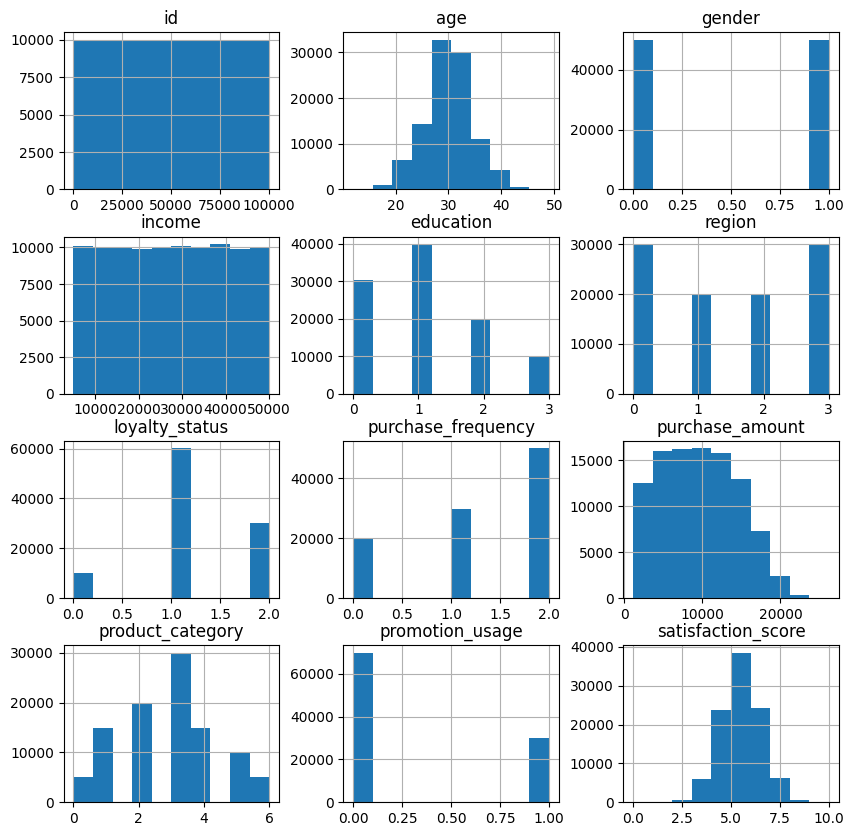

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 데이터 분포 확인 후 log1p 변환.

dataset.data.hist(figsize=(10,10))


# Predict Promition_usage

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier
# from xgboost.sklearn import XGBClassifier


from sklearn.metrics import mean_squared_error
import numpy as np

data = dataset.data
ycolumns = 'product_category'
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=[ycolumns]), data[ycolumns],  test_size=0.2, random_state=2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
  
model_data = []
listOfModels = [
    KNeighborsClassifier(n_neighbors=3),
    LogisticRegression(),
    GaussianNB(),
    SGDClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
]

print(X_train.shape)
for model in listOfModels:
  print(model.__class__.__name__)
  model.fit(X_train_scaled, y_train)
  
  y_pred = model.predict(X_test_scaled)
  model_data.append([model.__class__.__name__, mean_squared_error(y_test, y_pred), accuracy_score(y_test, y_pred)])
    
model_data_frame = pd.DataFrame(columns=["Model", "squared_error", "Accuracy_Score"], data=model_data)
print(model_data_frame.sort_values("Accuracy_Score"))

(80000, 11)
KNeighborsClassifier
LogisticRegression
GaussianNB
SGDClassifier
DecisionTreeClassifier
RandomForestClassifier
GradientBoostingClassifier
                        Model  squared_error  Accuracy_Score
4      DecisionTreeClassifier        2.24205         0.26505
0        KNeighborsClassifier        2.17695         0.26935
3               SGDClassifier        1.68390         0.31280
6  GradientBoostingClassifier        3.18055         0.32825
5      RandomForestClassifier        1.30995         0.35010
1          LogisticRegression        1.05830         0.38710
2                  GaussianNB        1.05830         0.38710


In [5]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True)
from sklearn.model_selection import GridSearchCV


In [23]:
np.isnan(X_train_scaled).sum()

0

In [6]:
#   RandomForestClassifier        2.75800         0.26000
# 6  GradientBoostingClassifier        2.28020         0.30104
# 1          LogisticRegression        2.25580         0.30248
# 2                  GaussianNB        2.25580         0.30248

In [7]:
RFC = RandomForestClassifier()
RFCParams = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [3, 5, 7, 10],
    'min_samples_split': [2, 3, 5, 10]
}
gsRFC = GridSearchCV(RFC, param_grid = RFCParams, cv=kfold, n_jobs=4)
gsRFC.fit(X_train, y_train)

RFC_best = gsRFC.best_estimator_

In [9]:
GBC = GradientBoostingClassifier()
GBCParams = {
    'loss' : ["log_loss", 'exponential'],
    'n_estimators' : [100,200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [4],
    'min_samples_leaf': [100,150],
    'max_features': [0.3, 0.1] 
}
gsGBC = GridSearchCV(GBC, param_grid = GBCParams, cv=kfold, n_jobs=4)
gsGBC.fit(X_train_scaled, y_train)

GBC_best = gsGBC.best_estimator_

/opt/homebrew/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/lib/python3.11/site-packages/sklea

In [42]:
LR = LogisticRegression()
LRParams = {
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.1, 1, 10]
}
gsLR = GridSearchCV(LR, param_grid = LRParams, cv=kfold, n_jobs=4)
gsLR.fit(X_train_scaled, y_train)

LR_best = gsLR.best_estimator_


In [11]:
GNB = GaussianNB()
GNBParams = {
    'priors': [None],
    'var_smoothing': [1e-09, 1e-10, 1e-11, 1e-12]
}
gsGNB = GridSearchCV(GNB, param_grid = GNBParams, cv=kfold, n_jobs=4)
gsGNB.fit(X_train_scaled, y_train)

GNB_best = gsGNB.best_estimator_


In [43]:
import pickle

with open('./models/GBC.pkl', 'wb') as f:
    pickle.dump(GBC_best, f)

with open('./models/LR.pkl', 'wb') as f:
    pickle.dump(LR_best, f) 

with open('./models/GNB.pkl', 'wb') as f:
    pickle.dump(GNB_best, f)

with open('./models/RFC.pkl', 'wb') as f:
    pickle.dump(RFC_best, f)
  

In [51]:
# load
with open('./models/LR.pkl', 'rb') as f:
    clf2 = pickle.load(f)

print(X_test, X_test_scaled)
print(clf2.predict(X_test_scaled))
print(gsLR.predict(X_test_scaled))
np.mean(clf2.predict(X_test_scaled) == y_test)

          id  age  gender  income  education  region  loyalty_status  \
6448    6449   27       1   35407          1       2               1   
50680  50681   34       0   18743          1       1               1   
814      815   31       1   29011          0       3               0   
20354  20355   28       0   21303          1       2               2   
49224  49225   36       1   48245          1       0               1   
...      ...  ...     ...     ...        ...     ...             ...   
60463  60464   32       0   39820          1       0               1   
34858  34859   33       1   28986          1       2               1   
96415  96416   29       0   45603          0       2               1   
1080    1081   39       1   17130          1       2               0   
24035  24036   28       0   14524          2       2               1   

       purchase_frequency  purchase_amount  promotion_usage  \
6448                    2            12166                0   
50680    

0.30248

In [14]:
# votingRegressor로 앙상블 모델 생성
from sklearn.ensemble import VotingClassifier


voting = VotingClassifier(estimators=[('RandomForestClassifier', RFC_best), ('GradientBoostingClassifier', GBC_best), ('Logistic Regression', LR_best), ('GaussianNB', GNB_best)], )

voting.fit(X_train_scaled, y_train)

predict = pd.Series(voting.predict(X_test_scaled))

predict_voting = pd.DataFrame({
    "preidct class": np.expm1(predict)
})

predict_voting

KeyboardInterrupt: 